<a href="https://colab.research.google.com/github/JasnaJovanova/DATA-science-laboratory-excercises/blob/master/Laboratory_exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics.


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_stock_price.csv to amazon_stock_price.csv


In [ ]:
df = pd.read_csv('amazon_stock_price.csv')
df.head()

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000


Explore the dataset using visualizations of your choice.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

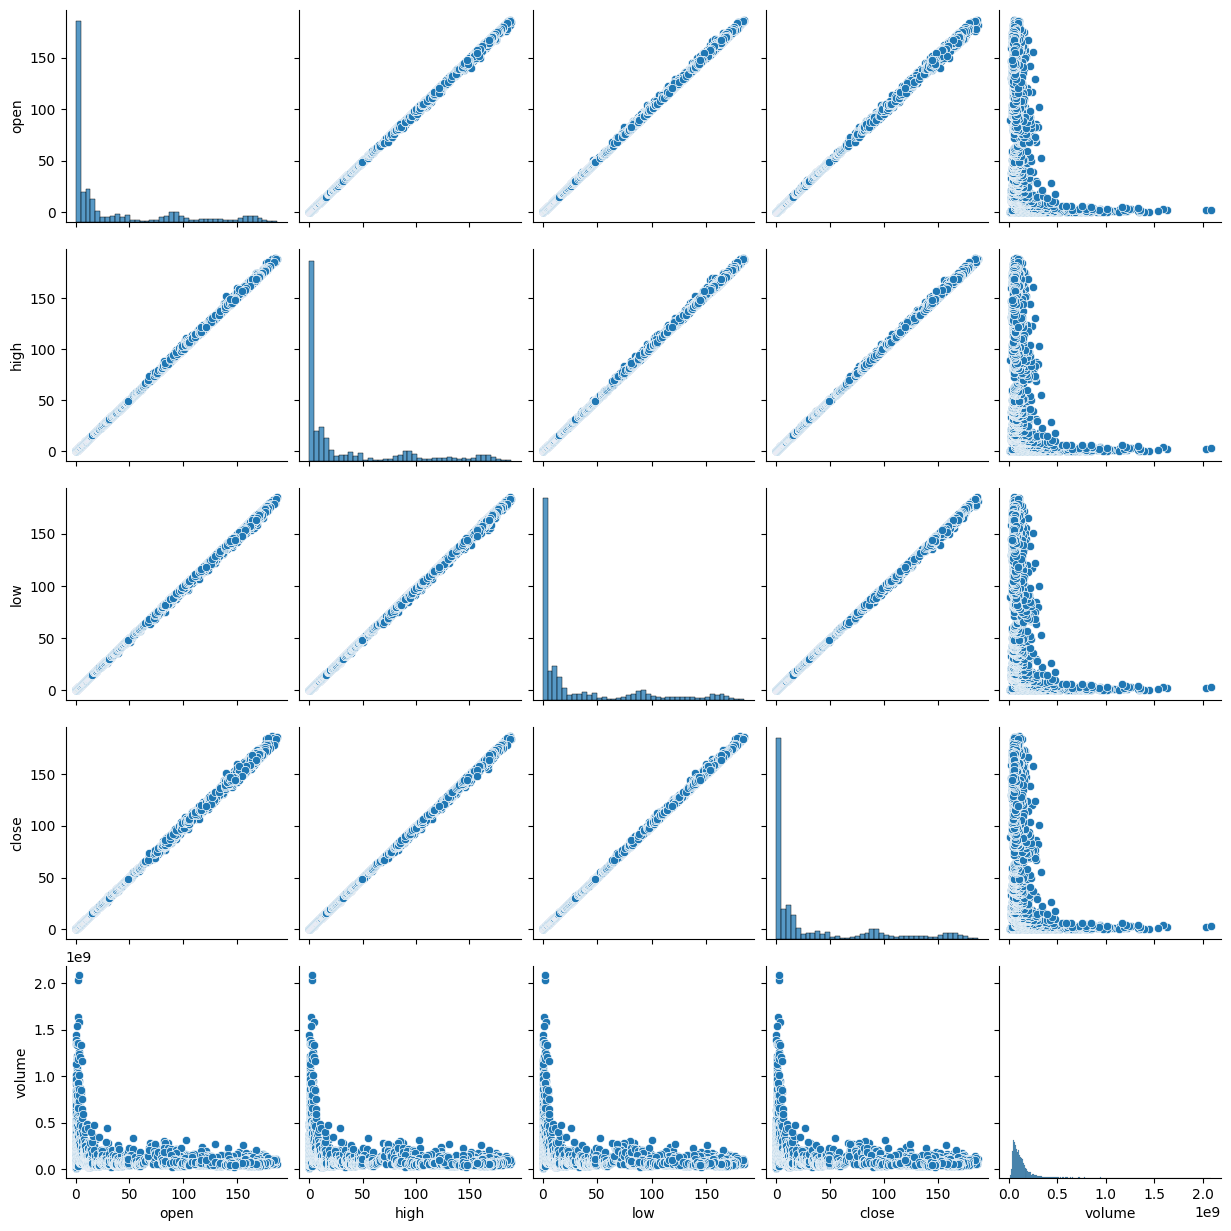

In [ ]:
sns.pairplot(df)
plt.show()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64
              open         high          low        close        volume
count  6685.000000  6685.000000  6685.000000  6685.000000  6.685000e+03
mean     34.046304    34.456169    33.601226    34.036846  1.403635e+08
std      49.872534    50.458248    49.228487    49.844164  1.390697e+08
min       0.070300     0.072400     0.065600     0.069800  9.744000e+06
25%       2.037000     2.075000     1.995000     2.042500  6.716800e+07
50%       7.129500     7.183500     6.989500     7.108500  1.039520e+08
75%      45.352000    45.480500    44.875000    45.189000  1.587760e+08
max     187.200000   188.654000   184.839500   186.570500  2.086584e+09


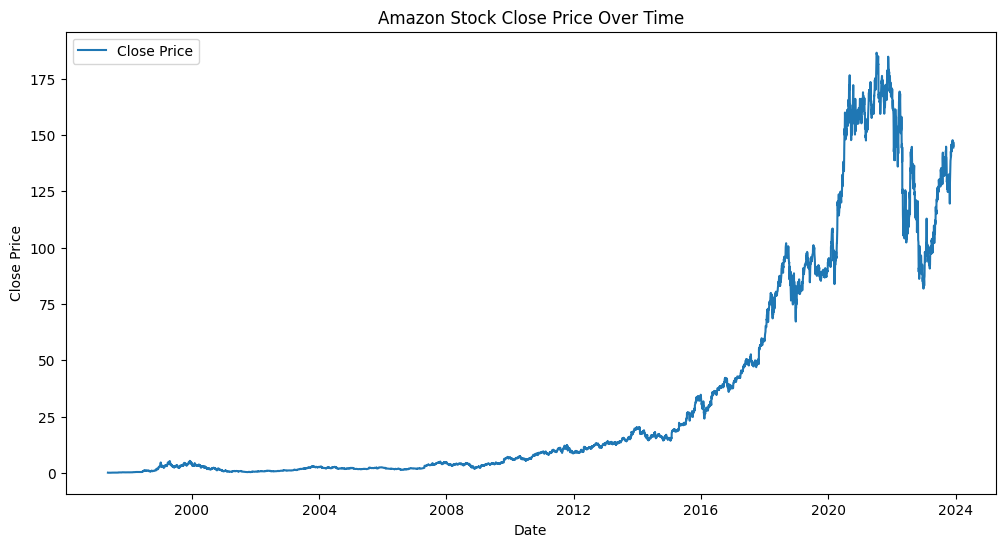

In [ ]:
# Check for null values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualizing the close price over time
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date']), df['close'], label='Close Price')
plt.title('Amazon Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Create lag features for the past 7 days
for i in range(1, 8):
    df[f'close_lag_{i}'] = df['close'].shift(i)

# Drop rows with NaN values (due to lagging)
df = df.dropna()

# Selecting relevant features
features = [f'close_lag_{i}' for i in range(1, 8)]
target = 'close'
X = df[features]
y = df[target]

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
rf_predictions = rf_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")

Random Forest MAE: 31.78554287050897
Random Forest MSE: 1854.4913398555816
Random Forest R^2: -0.8227460466969545


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred_xgb=xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
xgb_mse = mean_squared_error(y_test,y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f'XGBoost\n')
print(f'MSE: {xgb_mse}')
print(f'MAE: {xgb_mae}')
print(f'R2 : {xgb_r2}')

XGBoost

MSE: 2041.0151495739526
MAE: 33.88833610274264
R2 : -1.0060769307362905


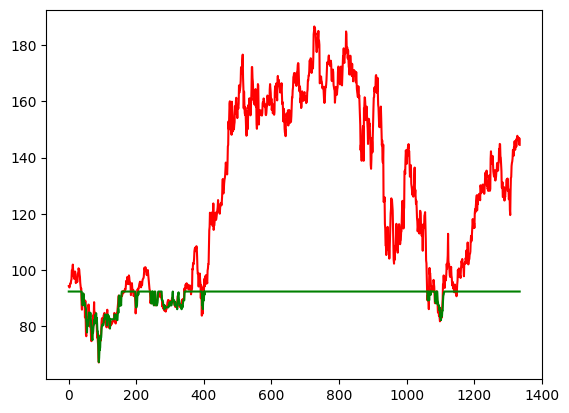

In [ ]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(y_pred_xgb, label='XGB Prediction', color='green')
plt.show()